# Wind Farm Layout

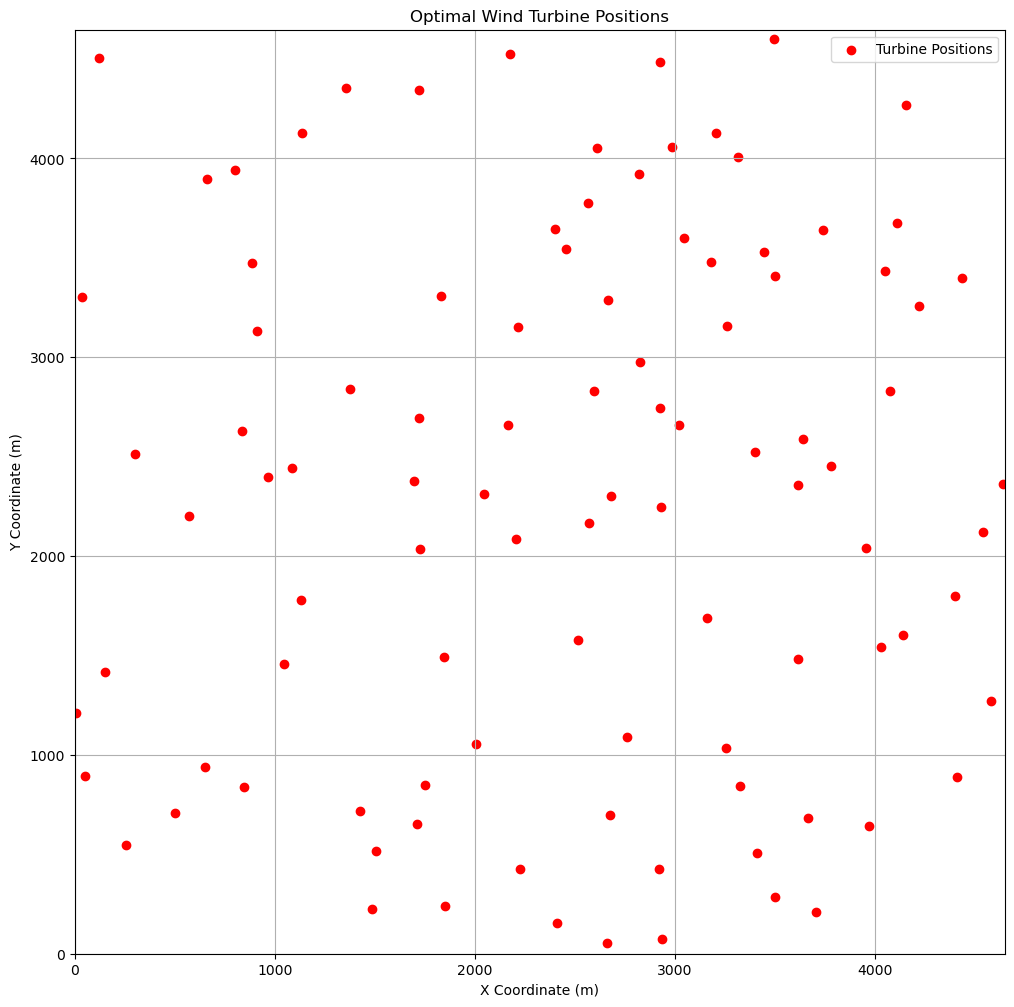

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Load the cleaned data with encoding as downloaded from python IDE
file_path = 'cleaned_TurkeyWT.csv'  # this CSV file should be inside the same folder as this python file
data = pd.read_csv(file_path)  # Try , 'latin1', 'iso-8859-1', or 'cp1252' if it is not encoded

# Wind farm dimensions
farm_size_km = 21.6
farm_length = farm_width = np.sqrt(farm_size_km * 1e6)  # Convert km² to m² and take sqrt

# Turbine dimensions and spacing recommendations
rotor_diameter = 120  # meters
hub_height = 100  # meters
blade_length = 60  # meters
cross_wind_spacing = (3 * rotor_diameter, 5 * rotor_diameter)  # 360m to 600m
down_wind_spacing = (5 * rotor_diameter, 7 * rotor_diameter)  # 600m to 840m

# Create the computational mesh
num_cells_x = num_cells_y = 100
x = np.linspace(0, farm_length, num_cells_x)
y = np.linspace(0, farm_width, num_cells_y)
mesh_x, mesh_y = np.meshgrid(x, y)

# Placeholder function for power output (can be replaced with a real model)
def compute_power_output(x_coords, y_coords, wind_data):
    return len(x_coords) * np.mean(wind_data['Wind Speed (m/s)'])

# Placeholder function for wake losses (can be replaced with a real model)
def compute_wake_losses(x_coords, y_coords, wind_data):
    losses = 0
    for i in range(len(x_coords)):
        for j in range(i + 1, len(x_coords)):
            distance = np.sqrt((x_coords[i] - x_coords[j])**2 + (y_coords[i] - y_coords[j])**2)
            if distance < 200:  # Simplified threshold distance for wake effect
                losses += 1 / distance  # Inverse distance loss
    return losses

# Objective function for optimization
def objective(turbine_positions):
    x_coords = turbine_positions[::2]
    y_coords = turbine_positions[1::2]
    power_output = compute_power_output(x_coords, y_coords, data)
    wake_losses = compute_wake_losses(x_coords, y_coords, data)
    return - (power_output - wake_losses)  # Maximize power output and minimize wake losses

# Number of turbines
num_turbines = 100

# Define the bounds for the turbine positions
bounds = [(0, farm_length) for _ in range(num_turbines)] + [(0, farm_width) for _ in range(num_turbines)]

# Perform optimization
result = differential_evolution(objective, bounds, maxiter=100, popsize=10, tol=1e-7)

# Extract the optimal turbine positions
optimal_positions = result.x
optimal_positions_reshaped = optimal_positions.reshape((num_turbines, 2))

# Plot the results
plt.figure(figsize=(12, 12))
plt.scatter(optimal_positions_reshaped[:, 0], optimal_positions_reshaped[:, 1], c='red', label='Turbine Positions')
plt.xlim(0, farm_length)
plt.ylim(0, farm_width)
plt.xlabel('X Coordinate (m)')
plt.ylabel('Y Coordinate (m)')
plt.title('Optimal Wind Turbine Positions')
plt.legend()
plt.grid(True)
plt.show()
